In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


reading iris dataset and finding basic details of data set

In [122]:
data=pd.read_excel('iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [123]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [124]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [125]:
data.shape

(150, 5)

In [126]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Encoding classification coloumn using label encoder 

In [127]:
from sklearn import preprocessing

In [128]:
label_encoder=preprocessing.LabelEncoder()

In [129]:
data['Classification']=label_encoder.fit_transform(data['Classification'])

In [130]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [131]:
x=data.drop('Classification',axis=1)
y=data['Classification']

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

# Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
logit_model=LogisticRegression()
logit_model=logit_model.fit(x_train,y_train)
y_pred_logit=logit_model.predict(x_test)

In [136]:
y_pred_logit

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [137]:
from sklearn.metrics import confusion_matrix

In [138]:
confusion_matrix(y_test,y_pred_logit)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [139]:
from sklearn.metrics import precision_score,recall_score

In [140]:
precision_score(y_test,y_pred_logit,average='micro')

1.0

In [141]:
recall_score(y_test,y_pred_logit,average='micro')

1.0

In [142]:
from sklearn.metrics import accuracy_score

In [143]:
accuracy_score(y_test,y_pred_logit)

1.0

# KNN

In [144]:
from sklearn.neighbors import KNeighborsClassifier

In [145]:
metric_k=[]
neighbors=range(3,18)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k)
  classifier=classifier.fit(x_train,y_train)
  y_pred_KNN=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred_KNN)
  metric_k.append(acc)

In [146]:
metric_k

[1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

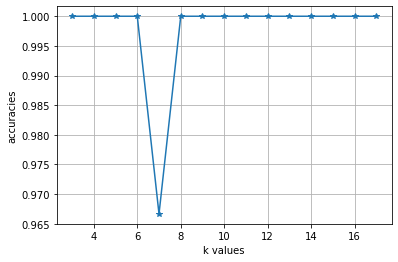

In [147]:
plt.plot(neighbors,metric_k,'*-')
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid()

In [148]:
classifier=KNeighborsClassifier(n_neighbors=4)
classifier=classifier.fit(x_train,y_train)
y_pred_KNN=classifier.predict(x_test)

In [149]:
accuracy_score(y_test,y_pred_KNN)

1.0

In [150]:
precision_score(y_test,y_pred_logit,average='micro')

1.0

In [151]:
recall_score(y_test,y_pred_KNN,average='micro')

1.0

In [152]:
confusion_matrix(y_test,y_pred_KNN)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

# SVM

In [153]:
from sklearn.svm import SVC

In [154]:
clf_svm=SVC(kernel='linear')
clf_svm=clf_svm.fit(x_train,y_train)
y_pred_svm=clf_svm.predict(x_test)

In [155]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [156]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [157]:
accuracy_score(y_test,y_pred_svm)

1.0

In [158]:
clf_svm2=SVC(kernel='rbf')
clf_svm2=clf_svm2.fit(x_train,y_train)
y_pred_svm2=clf_svm2.predict(x_test)

In [159]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [160]:
confusion_matrix(y_test,y_pred_svm2)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [161]:
accuracy_score(y_test,y_pred_svm2)

1.0

# Decision Tree

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(x_train,y_train)
y_pred_dt=dt_clf.predict(x_test)

In [164]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [165]:
accuracy_score(y_test,y_pred_dt)

1.0

# Random forest

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(x_train,y_train)
y_pred_clf=rf_clf.predict(x_test)

In [168]:
confusion_matrix(y_test,y_pred_clf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [169]:
accuracy_score(y_test,y_pred_clf)

1.0

All the classification methods we get accuracy one.so all methodes are best.